# CS5720: Neural Networks and Deep Learning (Spring 2025)
## ICP 4 - Problem 2
**Student Name:** Nidhin Ninan

**School:** University of Central Missouri

**Video Link:** https://drive.google.com/file/d/1i2KnXf3cOBp6eUs5tO5gOsSfDQ8fQKlb/view?usp=drive_link

# MNIST Handwritten Digit Classification
In this notebook we will:
1. Load and visualize the MNIST dataset.
2. Preprocess the data (reshape and scale) and convert labels to one-hot encoding.
3. Build, train, and evaluate a neural network model (using two hidden layers with ReLU activation).
4. Plot the training history (loss and accuracy for training and validation data).
5. Pick a test image, display it, and perform inference on that single image.
6. Experiment with alternative network architectures:
   - Change the number of hidden layers.
   - Change the activation functions to `tanh` and `sigmoid`.
7. Finally, run the training without scaling the images to observe the effect on performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


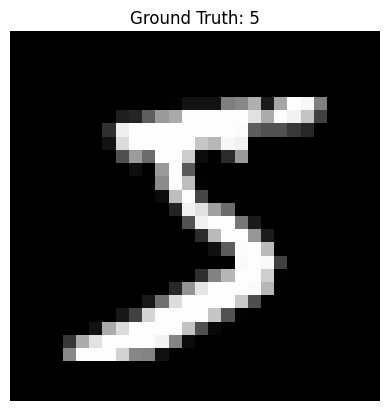

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display the first image in the training set
plt.imshow(train_images[0, :, :], cmap='gray')
plt.title('Ground Truth: {}'.format(train_labels[0]))
plt.axis('off')
plt.show()

In [3]:
# Calculate the dimension of each image (28x28 = 784)
dimData = np.prod(train_images.shape[1:])

# Reshape the images into (num_samples, 784)
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32')
test_data  = test_images.reshape(test_images.shape[0],  dimData).astype('float32')

# Scale the data to be between 0 and 1
train_data /= 255.0
test_data  /= 255.0

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot  = to_categorical(test_labels)

In [4]:
# Build the model
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_relu.add(Dense(512, activation='relu'))
model_relu.add(Dense(10, activation='softmax'))

# Compile the model
model_relu.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_relu = model_relu.fit(train_data, train_labels_one_hot,
                              batch_size=256,
                              epochs=20,
                              verbose=1,
                              validation_data=(test_data, test_labels_one_hot))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8319 - loss: 0.5353 - val_accuracy: 0.9347 - val_loss: 0.1927
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9653 - loss: 0.1102 - val_accuracy: 0.9733 - val_loss: 0.0812
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.9789 - loss: 0.0690 - val_accuracy: 0.9747 - val_loss: 0.0781
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9849 - loss: 0.0445 - val_accuracy: 0.9768 - val_loss: 0.0782
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9905 - loss: 0.0295 - val_accuracy: 0.9787 - val_loss: 0.0773
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9786 - val_loss: 0.0775
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9953 - loss: 0.0154 - val_accuracy: 0.9810 - val_loss: 0.0664
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9967 - loss: 0.0113 - val

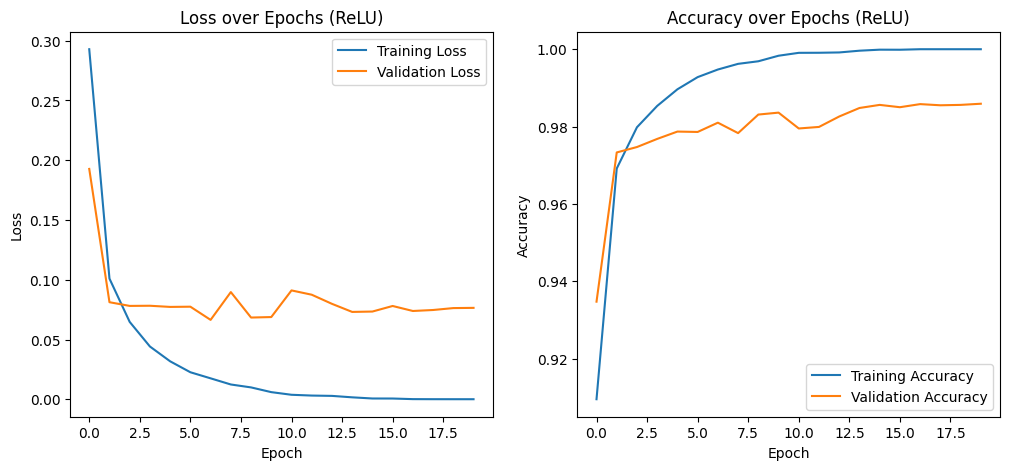

In [5]:
# Plot Loss and Accuracy for the ReLU model
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['loss'], label='Training Loss')
plt.plot(history_relu.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs (ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['accuracy'], label='Training Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs (ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [6]:
[test_loss, test_acc] = model_relu.evaluate(test_data, test_labels_one_hot)
print("Evaluation on Test Data (ReLU model): Loss = {:.4f}, Accuracy = {:.4f}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9835 - loss: 0.0953
Evaluation on Test Data (ReLU model): Loss = 0.0765, Accuracy = 0.9859


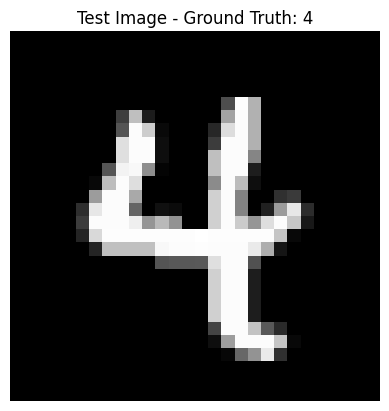

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted Label for the test image: 4


In [7]:
# Choose an index from the test set (e.g., 0)
index = np.random.randint(0, test_images.shape[0])

# Display the test image and its ground truth label
plt.imshow(test_images[index, :, :], cmap='gray')
plt.title("Test Image - Ground Truth: {}".format(test_labels[index]))
plt.axis('off')
plt.show()

# Preprocess the image for prediction (reshape and scale)
image_to_predict = test_images[index].reshape(1, dimData).astype('float32') / 255.0

# Get the prediction
prediction = model_relu.predict(image_to_predict)
predicted_label = np.argmax(prediction)
print("Predicted Label for the test image: {}".format(predicted_label))

In [8]:
# Build the model with 3 hidden layers and tanh activation
model_tanh = Sequential()
model_tanh.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_tanh.add(Dense(512, activation='tanh'))
model_tanh.add(Dense(512, activation='tanh'))
model_tanh.add(Dense(10, activation='softmax'))

# Compile the model
model_tanh.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_tanh = model_tanh.fit(train_data, train_labels_one_hot,
                              batch_size=256,
                              epochs=20,
                              verbose=1,
                              validation_data=(test_data, test_labels_one_hot))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.8001 - loss: 0.6448 - val_accuracy: 0.9218 - val_loss: 0.2466
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9472 - loss: 0.1737 - val_accuracy: 0.9393 - val_loss: 0.1851
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9671 - loss: 0.1033 - val_accuracy: 0.9698 - val_loss: 0.0928
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9790 - loss: 0.0654 - val_accuracy: 0.9659 - val_loss: 0.1056
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9852 - loss: 0.0488 - val_accuracy: 0.9705 - val_loss: 0.0887
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9890 - loss: 0.0343 - val_accuracy: 0.9786 - val_loss: 0.0679
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9931 - loss: 0.0234 - val_accuracy: 0.9798 - val_loss: 0.0612
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9948 - loss: 0.0159 - 

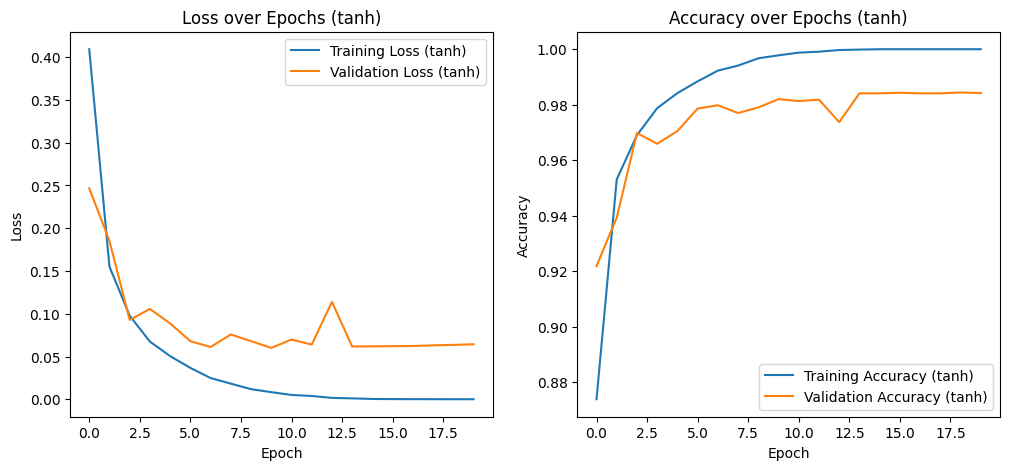

In [9]:
# Plot Loss and Accuracy for the tanh model
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_tanh.history['loss'], label='Training Loss (tanh)')
plt.plot(history_tanh.history['val_loss'], label='Validation Loss (tanh)')
plt.title('Loss over Epochs (tanh)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_tanh.history['accuracy'], label='Training Accuracy (tanh)')
plt.plot(history_tanh.history['val_accuracy'], label='Validation Accuracy (tanh)')
plt.title('Accuracy over Epochs (tanh)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
# Build the model with 2 hidden layers and sigmoid activation
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model_sigmoid.add(Dense(512, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))

# Compile the model
model_sigmoid.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_sigmoid = model_sigmoid.fit(train_data, train_labels_one_hot,
                                    batch_size=256,
                                    epochs=20,
                                    verbose=1,
                                    validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5807 - loss: 1.3344 - val_accuracy: 0.8835 - val_loss: 0.3901
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8953 - loss: 0.3445 - val_accuracy: 0.9132 - val_loss: 0.3016
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9156 - loss: 0.2779 - val_accuracy: 0.9297 - val_loss: 0.2428
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9309 - loss: 0.2300 - val_accuracy: 0.9356 - val_loss: 0.2108
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9398 - loss: 0.1992 - val_accuracy: 0.9468 - val_loss: 0.1749
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9487 - loss: 0.1685 - val_accuracy: 0.9508 - val_loss: 0.1589
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9558 - loss: 0.1478 - val_accuracy: 0.9530 - val_loss: 0.1525
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9604 - loss: 0.1318 - val_a

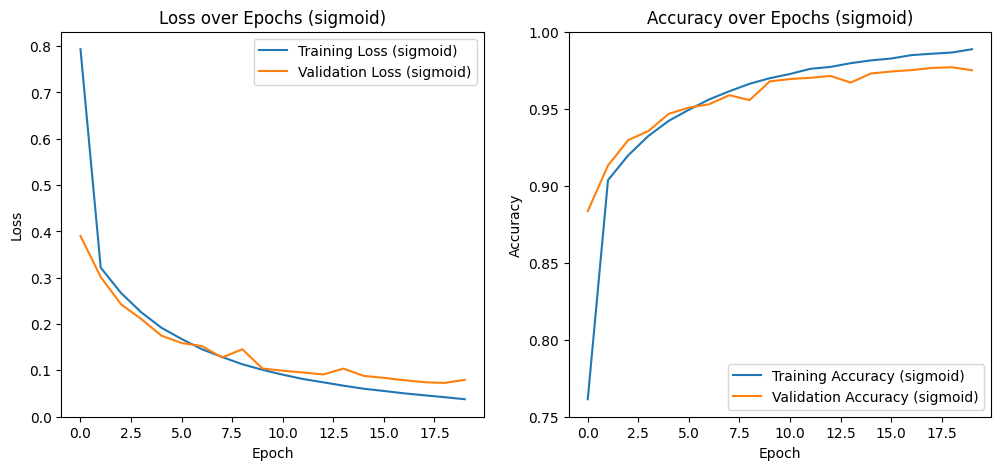

In [11]:
# Plot Loss and Accuracy for the sigmoid model
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['loss'], label='Training Loss (sigmoid)')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss (sigmoid)')
plt.title('Loss over Epochs (sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy (sigmoid)')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy (sigmoid)')
plt.title('Accuracy over Epochs (sigmoid)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# Preprocess data without scaling: only reshaping is done
train_data_no_scale = train_images.reshape(train_images.shape[0], dimData).astype('float32')
test_data_no_scale  = test_images.reshape(test_images.shape[0],  dimData).astype('float32')

# Build the model (using the same two hidden layer architecture with ReLU)
model_no_scale = Sequential()
model_no_scale.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_no_scale.add(Dense(512, activation='relu'))
model_no_scale.add(Dense(10, activation='softmax'))

# Compile the model
model_no_scale.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on non-scaled data
history_no_scale = model_no_scale.fit(train_data_no_scale, train_labels_one_hot,
                                      batch_size=256,
                                      epochs=20,
                                      verbose=1,
                                      validation_data=(test_data_no_scale, test_labels_one_hot))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7883 - loss: 23.4484 - val_accuracy: 0.9031 - val_loss: 0.8385
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9453 - loss: 0.4174 - val_accuracy: 0.9400 - val_loss: 0.4501
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9571 - loss: 0.2430 - val_accuracy: 0.9593 - val_loss: 0.2832
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9637 - loss: 0.1935 - val_accuracy: 0.9598 - val_loss: 0.2419
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9712 - loss: 0.1508 - val_accuracy: 0.9578 - val_loss: 0.3066
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9748 - loss: 0.1368 - val_accuracy: 0.9630 - val_loss: 0.3291
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9787 - loss: 0.1190 - val_accuracy: 0.9621 - val_loss: 0.3170
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9828 - loss: 0.0993 - val_acc

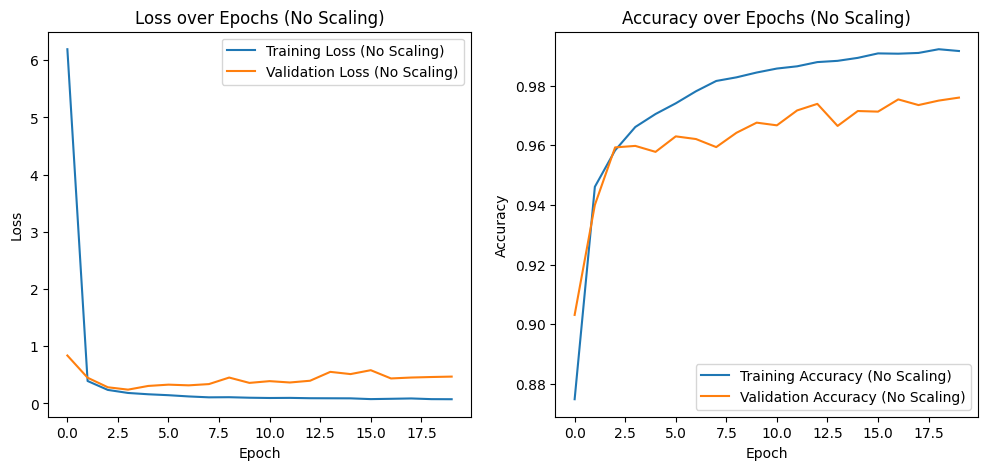

In [13]:
# Plot Loss and Accuracy for the model trained without scaling
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_no_scale.history['loss'], label='Training Loss (No Scaling)')
plt.plot(history_no_scale.history['val_loss'], label='Validation Loss (No Scaling)')
plt.title('Loss over Epochs (No Scaling)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_scale.history['accuracy'], label='Training Accuracy (No Scaling)')
plt.plot(history_no_scale.history['val_accuracy'], label='Validation Accuracy (No Scaling)')
plt.title('Accuracy over Epochs (No Scaling)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
# Evaluate the model trained without scaling
[test_loss_ns, test_acc_ns] = model_no_scale.evaluate(test_data_no_scale, test_labels_one_hot)
print("Evaluation on Test Data (No Scaling): Loss = {:.4f}, Accuracy = {:.4f}".format(test_loss_ns, test_acc_ns))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.6060
Evaluation on Test Data (No Scaling): Loss = 0.4697, Accuracy = 0.9760
